In [2]:
! pip install beautifulsoup4
! pip install geopandas

In [1]:
from bs4 import BeautifulSoup
import requests
from csv import writer
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
from pandas import json_normalize
import time

# Create Muni DF and save as excel 'df_muni_prototype.xlsx'

In [2]:
city_dicts= [{'city':'Chisinau', 'country':'Moldova', 'population':677453}, 
             {'city':'Riga','country':'Latvia','population':605802},
             {'city':'Tallinn','country':'Estonia','population':437811},
             {'city':'Vilnius','country':'Lithuania','population':591632}]
df_muni_prototype = pd.DataFrame(city_dicts)
df_muni_prototype = df_muni_prototype.set_index('city')
df_muni_prototype['muni_cityhall']= None
df_muni_prototype = df_muni_prototype.set_geometry('muni_cityhall')
print(df_muni_prototype)

            country  population muni_cityhall
city                                         
Chisinau    Moldova      677453          None
Riga         Latvia      605802          None
Tallinn     Estonia      437811          None
Vilnius   Lithuania      591632          None


In [3]:
from shapely.geometry import Point
df_muni_prototype['muni_cityhall']['Chisinau']= Point(28.8347875,47.0226325)
df_muni_prototype['muni_cityhall']['Riga']= Point(24.1062456,56.9475351)
df_muni_prototype['muni_cityhall']['Tallinn']= Point(24.7440026,59.4328494)
df_muni_prototype['muni_cityhall']['Vilnius']= Point(25.2847619,54.6781121)

print(df_muni_prototype)
df_muni_prototype.to_excel('df_muni_prototype.xlsx', index=True)

            country  population              muni_cityhall
city                                                      
Chisinau    Moldova      677453  POINT (28.83479 47.02263)
Riga         Latvia      605802  POINT (24.10625 56.94754)
Tallinn     Estonia      437811  POINT (24.74400 59.43285)
Vilnius   Lithuania      591632  POINT (25.28476 54.67811)


C:\Users\valer\AppData\Local\Temp\ipykernel_13120\3626199859.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


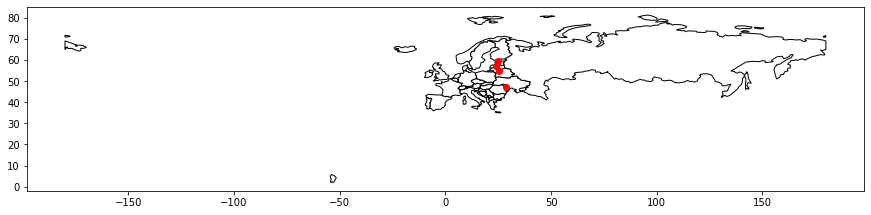

In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# restrict to Europe
ax = world[world.continent == 'Europe'].plot(
    color='white', edgecolor='black')
df_muni_prototype.plot(ax=ax, marker='o', color='red')

fig= plt.gcf()
fig.set_size_inches(15,11)
fig.savefig('df_muni_prototype.png', dpi=300)
plt.show()

In [5]:
df_PT_prototype = pd.read_excel("df_PT_prototype.xlsx")
df_EDU_prototype =pd.read_excel("df_EDU_prototype.xlsx")
df_SF_prototype =pd.read_excel("df_SF_prototype.xlsx")
df_Cult_prototype = pd.read_excel("df_Cult_prototype.xlsx")
df_RS_prototype = pd.read_excel("df_RS_prototype.xlsx")
df_AES_prototype =pd.read_excel("df_AES_prototype.xlsx")
df_health_prototype =pd.read_excel("df_health_prototype.xlsx")

In [6]:
df_prototype_all = pd.concat([df_PT_prototype,df_EDU_prototype,df_SF_prototype,
                              df_Cult_prototype,df_RS_prototype, df_AES_prototype, df_health_prototype])
df_prototype_all= df_prototype_all.merge(df_muni_prototype,how='left',on='city')
df_prototype_all.info()
df_prototype_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7400 entries, 0 to 7399
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   place_id        7400 non-null   object  
 1   name            7400 non-null   object  
 2   type            7400 non-null   object  
 3   lat             7400 non-null   float64 
 4   lng             7400 non-null   float64 
 5   plus_code       7306 non-null   object  
 6   city            7400 non-null   object  
 7   index_name      7400 non-null   object  
 8   sub_index_name  7400 non-null   object  
 9   country         7400 non-null   object  
 10  population      7400 non-null   int64   
 11  muni_cityhall   7400 non-null   geometry
dtypes: float64(2), geometry(1), int64(1), object(8)
memory usage: 751.6+ KB


,place_id,name,type,lat,lng,plus_code,city,index_name,sub_index_name,country,population,muni_cityhall
0,ChIJl30ylaLXy0AR7GNKUIX5MlQ,Rapid Stadium Bus Stop,"['transit_station', 'point_of_interest', 'esta...",47.087469,28.771249,"3QPC+XF Ghidighici, Moldova",Chisinau,public transport,bus stop,Moldova,677453,POINT (28.83479 47.02263)
1,ChIJb_35a815yUAR89CHN6rcjZo,Airport Town Bus Stop,"['transit_station', 'point_of_interest', 'esta...",46.941979,28.926388,"WWRG+QH Chişinău, Moldova",Chisinau,public transport,bus stop,Moldova,677453,POINT (28.83479 47.02263)
2,ChIJAUOWUaDXy0ARee5Qo0TLZ2Y,City Hall Bus Stop,"['transit_station', 'point_of_interest', 'esta...",47.089269,28.761815,"3QQ6+PP Ghidighici, Moldova",Chisinau,public transport,bus stop,Moldova,677453,POINT (28.83479 47.02263)
3,ChIJrZMm0L99yUARe2nQTlMuXbU,Chisinau Bus Station Creanga,"['transit_station', 'point_of_interest', 'esta...",47.038403,28.808191,"2RQ5+97 Chişinău, Moldova",Chisinau,public transport,bus stop,Moldova,677453,POINT (28.83479 47.02263)
4,ChIJ6Wqrmjt8yUARS7ul7opedN4,Chisinau Central Bus Station,"['transit_station', 'point_of_interest', 'esta...",47.019610,28.845327,"2R9W+R4 Chişinău, Moldova",Chisinau,public transport,bus stop,Moldova,677453,POINT (28.83479 47.02263)


In [9]:
unique_index = df_prototype_all['index_name'].unique()
df_temp = pd.DataFrame({'index_name': unique_index})
df_temp.head()

df_muni_test = pd.merge(df_muni_prototype,df_temp)

,index_name
0,public transport
1,educational facilities
2,sport facilities
3,cultural facilities
4,recreational spaces


# Google Maps API data extraction

In [4]:
from urllib.parse import urlencode
import requests

api_key='Google API key'

# 1 Public Transport DF request using Places API

In [25]:
#NEW Places API - 'Nearby Search' request - multiple results
prototype_places_endpoint = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
municipality = 0
# create a new empty dataframe for the public transport data
df_PT_prototype = pd.DataFrame(columns=["place_id","name", "type", "lat", "lng", 
                                        "plus_code", "city","index_name","sub_index_name"])

# append Bus Stop data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'keyword':'bus stop',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the PT dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"public transport",
                "sub_index_name":"bus stop"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_PT_prototype = pd.concat([df_PT_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Trolley Stop data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'keyword':'trolleybus stop',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the PT dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"public transport",
                "sub_index_name":"trolleybus stop"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_PT_prototype = pd.concat([df_PT_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Tram/Light rail Station data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'light_rail_station',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the PT dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"public transport",
                "sub_index_name":"tram stop"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_PT_prototype = pd.concat([df_PT_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key  
            }

# append Train Station data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'train_station',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the PT dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"public transport",
                "sub_index_name":"train station"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_PT_prototype = pd.concat([df_PT_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Airport data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'airport',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the PT dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"public transport",
                "sub_index_name":"airport"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_PT_prototype = pd.concat([df_PT_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(3)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# drop duplicated place_id
df_PT_prototype.drop_duplicates("place_id",inplace=True)

# set place_id column as index
df_PT_prototype.set_index("place_id", inplace=True)
df_PT_prototype.info()

# save the dataframe to an Excel file
df_PT_prototype.to_excel("df_PT_prototype.xlsx", index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, ChIJl30ylaLXy0AR7GNKUIX5MlQ to ChIJGa4_EDi83UYRe1DDF3v5KrA
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            499 non-null    object
 1   type            499 non-null    object
 2   lat             499 non-null    object
 3   lng             499 non-null    object
 4   plus_code       490 non-null    object
 5   city            499 non-null    object
 6   index_name      499 non-null    object
 7   sub_index_name  499 non-null    object
dtypes: object(8)
memory usage: 35.1+ KB


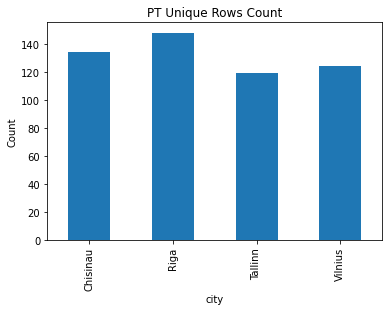

In [9]:
# count number of unique rows based on index
count = df_PT_prototype.groupby('city').size()

# plot the results as a bar chart
count.plot(kind='bar')
plt.xlabel('city')
plt.ylabel('Count')
plt.title('PT Unique Rows Count')
plt.show()

# 2 Educational facilities DF request using Places API

In [26]:
#NEW Places API - 'Nearby Search' request - multiple results
prototype_places_endpoint = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
municipality = 0
# create a new empty dataframe for the public transport data
df_EDU_prototype = pd.DataFrame(columns=["place_id","name", "type", "lat", "lng", 
                                         "plus_code", "city","index_name","sub_index_name"])

# append Primary School data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'primary_school',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"educational facilities",
                "sub_index_name":"primary school"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_EDU_prototype = pd.concat([df_EDU_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Secondary School data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'secondary_school',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"educational facilities",
                "sub_index_name":"secondary school"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_EDU_prototype = pd.concat([df_EDU_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append High School data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'keyword':'high school',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"educational facilities",
                "sub_index_name":"high school"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_EDU_prototype = pd.concat([df_EDU_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key  
            }

# append University data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'university',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"educational facilities",
                "sub_index_name":"university"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_EDU_prototype = pd.concat([df_EDU_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Kindergarten/Nursery school data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'keyword':'kindergarten',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"educational facilities",
                "sub_index_name":"kindergarten"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_EDU_prototype = pd.concat([df_EDU_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# drop duplicated place_id
df_EDU_prototype.drop_duplicates("place_id",inplace=True)

# set place_id column as index
df_EDU_prototype.set_index("place_id", inplace=True)
df_EDU_prototype.info()

# save the dataframe to an Excel file
df_EDU_prototype.to_excel("df_EDU_prototype.xlsx", index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 789 entries, ChIJdTbPZot8yUARbDDtnJguUJE to ChIJvwbQs_qO3UYREG4B8qqjEsA
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            789 non-null    object
 1   type            789 non-null    object
 2   lat             789 non-null    object
 3   lng             789 non-null    object
 4   plus_code       785 non-null    object
 5   city            789 non-null    object
 6   index_name      789 non-null    object
 7   sub_index_name  789 non-null    object
dtypes: object(8)
memory usage: 55.5+ KB


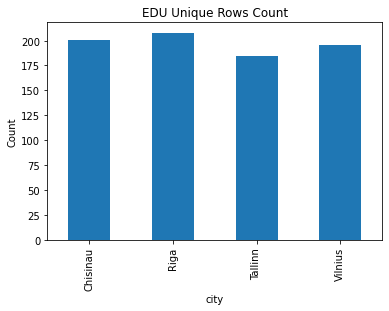

In [27]:
# count number of unique rows based on index
count = df_EDU_prototype.groupby('city').size()

# plot the results as a bar chart
count.plot(kind='bar')
plt.xlabel('city')
plt.ylabel('Count')
plt.title('EDU Unique Rows Count')
plt.show()

# 3 Sport facilities DF request using Places API

In [28]:
#NEW Places API - 'Nearby Search' request - multiple results
prototype_places_endpoint = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
municipality = 0
# create a new empty dataframe for the public transport data
df_SF_prototype = pd.DataFrame(columns=["place_id","name", "type", "lat", "lng", 
                                        "plus_code", "city","index_name","sub_index_name"])

# append Gym data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'gym',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"sport facilities",
                "sub_index_name":"gym"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_SF_prototype = pd.concat([df_SF_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Stadium data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'stadium',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"sport facilities",
                "sub_index_name":"stadium"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_SF_prototype = pd.concat([df_SF_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Sport Club data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'keyword':'sport club',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"sport facilities",
                "sub_index_name":"sport club"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_SF_prototype = pd.concat([df_SF_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key  
            }

# append Public Swimming Pool data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'keyword':'public swimming pool',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"sport facilities",
                "sub_index_name":"swimming pool"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_SF_prototype = pd.concat([df_SF_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# drop duplicated place_id
df_SF_prototype.drop_duplicates("place_id",inplace=True)

# set place_id column as index
df_SF_prototype.set_index("place_id", inplace=True)
df_SF_prototype.info()

# save the dataframe to an Excel file
df_SF_prototype.to_excel("df_SF_prototype.xlsx", index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 693 entries, ChIJ49RTr2B8yUAREBpUlE6RgTQ to ChIJu62PRj2R3UYRFTTXkUdow0k
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            693 non-null    object
 1   type            693 non-null    object
 2   lat             693 non-null    object
 3   lng             693 non-null    object
 4   plus_code       665 non-null    object
 5   city            693 non-null    object
 6   index_name      693 non-null    object
 7   sub_index_name  693 non-null    object
dtypes: object(8)
memory usage: 48.7+ KB


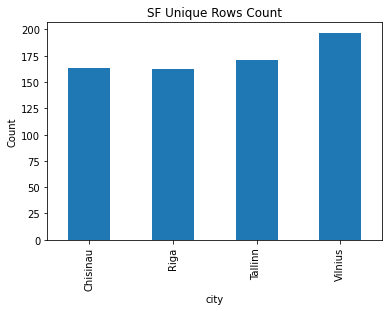

In [29]:
# count number of unique rows based on index
count = df_SF_prototype.groupby('city').size()

# plot the results as a bar chart
count.plot(kind='bar')
plt.xlabel('city')
plt.ylabel('Count')
plt.title('SF Unique Rows Count')
plt.show()

# 4 Cultural Facilities DF request using Places API

In [30]:
#NEW Places API - 'Nearby Search' request - multiple results
prototype_places_endpoint = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
municipality = 0
# create a new empty dataframe for the public transport data
df_Cult_prototype = pd.DataFrame(columns=["place_id","name", "type", "lat", "lng", 
                                          "plus_code", "city","index_name","sub_index_name"])

# append Cinema data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'movie_theater',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"cultural facilities",
                "sub_index_name":"cinema"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_Cult_prototype = pd.concat([df_Cult_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Theater data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'keyword':'theater',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"cultural facilities",
                "sub_index_name":"theater"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_Cult_prototype = pd.concat([df_Cult_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Museum data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'museum',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"cultural facilities",
                "sub_index_name":"museum"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_Cult_prototype = pd.concat([df_Cult_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key  
            }

# append Libraries data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'library',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"cultural facilities",
                "sub_index_name":"library"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_Cult_prototype = pd.concat([df_Cult_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Art Gallery data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'art_gallery',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"cultural facilities",
                "sub_index_name":"art gallery"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_Cult_prototype = pd.concat([df_Cult_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# drop duplicated place_id
df_Cult_prototype.drop_duplicates("place_id",inplace=True)

# set place_id column as index
df_Cult_prototype.set_index("place_id", inplace=True)
df_Cult_prototype.info()

# save the dataframe to an Excel file
df_Cult_prototype.to_excel("df_Cult_prototype.xlsx", index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, ChIJB83wN8t9yUARY5hYaIhsgxE to ChIJVVXFx3GU3UYRzfDMgIQPqIc
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            775 non-null    object
 1   type            775 non-null    object
 2   lat             775 non-null    object
 3   lng             775 non-null    object
 4   plus_code       768 non-null    object
 5   city            775 non-null    object
 6   index_name      775 non-null    object
 7   sub_index_name  775 non-null    object
dtypes: object(8)
memory usage: 54.5+ KB


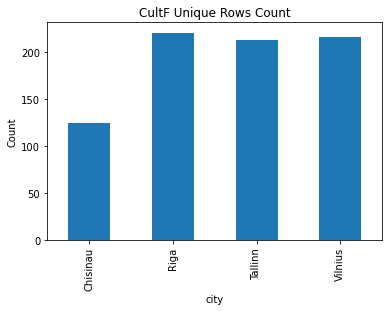

In [31]:
# count number of unique rows based on index
count = df_Cult_prototype.groupby('city').size()

# plot the results as a bar chart
count.plot(kind='bar')
plt.xlabel('city')
plt.ylabel('Count')
plt.title('CultF Unique Rows Count')
plt.show()

# 5 Recreational Spaces DF request using Places API

In [7]:
#NEW Places API - 'Nearby Search' request - multiple results
prototype_places_endpoint = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
municipality = 0
# create a new empty dataframe for the public transport data
df_RS_prototype = pd.DataFrame(columns=["place_id","name", "type", "lat", "lng", 
                                        "plus_code", "city","index_name","sub_index_name"])

# append Parks data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'park',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"recreational spaces",
                "sub_index_name":"park"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_RS_prototype = pd.concat([df_RS_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Playgrounds data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'keyword':'playground',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"recreational spaces",
                "sub_index_name":"playground"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_RS_prototype = pd.concat([df_RS_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Amusement Parks data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'amusement_park',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"recreational spaces",
                "sub_index_name":"amusement park"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_RS_prototype = pd.concat([df_RS_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key  
            }

# append Cafe data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'cafe',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"recreational spaces",
                "sub_index_name":"cafe"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_RS_prototype = pd.concat([df_RS_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Restaurants data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'restaurant',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"recreational spaces",
                "sub_index_name":"restaurant"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_RS_prototype = pd.concat([df_RS_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Bowling Alley data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'bowling_alley',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"recreational spaces",
                "sub_index_name":"bowling alley"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_RS_prototype = pd.concat([df_RS_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Night Clubs data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'night_club',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"recreational spaces",
                "sub_index_name":"night club"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_RS_prototype = pd.concat([df_RS_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Spa data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'spa',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"recreational spaces",
                "sub_index_name":"spa"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_RS_prototype = pd.concat([df_RS_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }          

# append Bar data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'bar',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"recreational spaces",
                "sub_index_name":"bar"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_RS_prototype = pd.concat([df_RS_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }          
            
# drop duplicated place_id
df_RS_prototype.drop_duplicates("place_id",inplace=True)

# set place_id column as index
df_RS_prototype.set_index("place_id", inplace=True)
df_RS_prototype.info()

# save the dataframe to an Excel file
df_RS_prototype.to_excel("df_RS_prototype.xlsx", index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1577 entries, ChIJHa2jhMZ9yUAR9N72tUVHbfg to ChIJC8_1iRCU3UYRE_QkJ6npX_g
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            1577 non-null   object
 1   type            1577 non-null   object
 2   lat             1577 non-null   object
 3   lng             1577 non-null   object
 4   plus_code       1570 non-null   object
 5   city            1577 non-null   object
 6   index_name      1577 non-null   object
 7   sub_index_name  1577 non-null   object
dtypes: object(8)
memory usage: 110.9+ KB


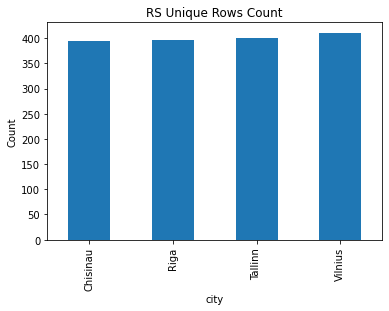

In [6]:
# count number of unique rows based on index
count = df_RS_prototype.groupby('city').size()

# plot the results as a bar chart
count.plot(kind='bar')
plt.xlabel('city')
plt.ylabel('Count')
plt.title('RS Unique Rows Count')
plt.show()

# 6 Access to Essential Services DF request using Places API

In [34]:
#NEW Places API - 'Nearby Search' request - multiple results
prototype_places_endpoint = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
municipality = 0
# create a new empty dataframe for the public transport data
df_AES_prototype = pd.DataFrame(columns=["place_id","name", "type", "lat", "lng", 
                                         "plus_code", "city","index_name","sub_index_name"])

# append ATM data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'atm',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"atm"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Supermarket data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'supermarket',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"supermarket"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Convenience Store data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'convenience_store',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"convenience store"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key  
            }

# append Banks data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'bank',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"bank office"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Hair Care shops data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'hair_care',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"hair care"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Funeral Homes data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'funeral_home',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"funeral home"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Police office data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'police',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"police office"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Lawyer data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'lawyer',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"lawyer office"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }          

# append Parking data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'parking',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"parking"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }          
            
# append Shopping Mall data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'shopping_mall',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"shopping mall"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }
            
# append Veterinary care data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'veterinary_care',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"essential services",
                "sub_index_name":"veterinary care"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_AES_prototype = pd.concat([df_AES_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }
            
# drop duplicated place_id
df_AES_prototype.drop_duplicates("place_id",inplace=True)

# set place_id column as index
df_AES_prototype.set_index("place_id", inplace=True)
df_AES_prototype.info()

# save the dataframe to an Excel file
df_AES_prototype.to_excel("df_AES_prototype.xlsx", index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 2141 entries, ChIJ-ZSbgTJ8yUARttX11_QOWng to ChIJicglZGeR3UYROVgcys6SKR8
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            2141 non-null   object
 1   type            2141 non-null   object
 2   lat             2141 non-null   object
 3   lng             2141 non-null   object
 4   plus_code       2114 non-null   object
 5   city            2141 non-null   object
 6   index_name      2141 non-null   object
 7   sub_index_name  2141 non-null   object
dtypes: object(8)
memory usage: 150.5+ KB


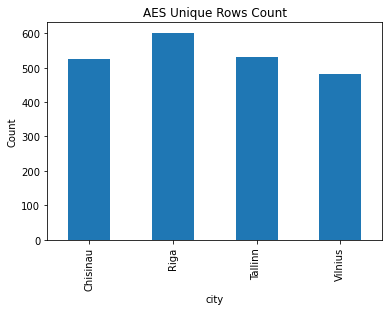

In [35]:
# count number of unique rows based on index
count = df_AES_prototype.groupby('city').size()

# plot the results as a bar chart
count.plot(kind='bar')
plt.xlabel('city')
plt.ylabel('Count')
plt.title('AES Unique Rows Count')
plt.show()

# 7 Health Services DF request using Places API

In [36]:
#NEW Places API - 'Nearby Search' request - multiple results
prototype_places_endpoint = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
municipality = 0
# create a new empty dataframe for the public transport data
df_health_prototype = pd.DataFrame(columns=["place_id","name", "type", "lat", "lng", 
                                            "plus_code", "city","index_name","sub_index_name"])

# append Pharmacy data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'pharmacy',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"health services",
                "sub_index_name":"pharmacy"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_health_prototype = pd.concat([df_health_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Doctor office data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'doctor',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"health services",
                "sub_index_name":"doctor office"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_health_prototype = pd.concat([df_health_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# append Hospital data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'hospital',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"health services",
                "sub_index_name":"hospital"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_health_prototype = pd.concat([df_health_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key  
            }

# append Dentist data
for i, row in df_muni_prototype.iterrows():
    municipality = i
    lng, lat= row['muni_cityhall'].x, row['muni_cityhall'].y
    params = {
        'location': f'{lat},{lng}',
        'radius': 16000,
        'vicinity': municipality,
        'type':'dentist',
        'key': api_key
        }
    next_page_token = True
    while next_page_token:
        params_encoded = urlencode(params)
        places_url = f"{prototype_places_endpoint}?{params_encoded}"
        # Make API request
        response = requests.get(places_url)
        # Process response
        json_data = response.json()
          
        # loop through each result and append the data to the dataframe
        df_newrows = []
        for result in json_data["results"]:
            newrow = {
                "place_id": result["place_id"],
                "name": result["name"],
                "type": result["types"],
                "lat": result["geometry"]["location"]["lat"],
                "lng": result["geometry"]["location"]["lng"],
                "plus_code": result["plus_code"]["compound_code"] if "plus_code" in result else None,
                "city": i,
                "index_name":"health services",
                "sub_index_name":"dentist"
            }
            df_newrows.append(newrow)
        
        # add new rows to the dataframe
        df_health_prototype = pd.concat([df_health_prototype, pd.DataFrame(df_newrows)])
        
        # check if there are more pages of results
        next_page_token = json_data.get("next_page_token")
        if next_page_token:
            # add a sleep time to prevent sending too many requests too quickly
            time.sleep(4)
            params = {
                'pagetoken': next_page_token,
                'key': api_key
            }

# drop duplicated place_id
df_health_prototype.drop_duplicates("place_id",inplace=True)

# set place_id column as index
df_health_prototype.set_index("place_id", inplace=True)
df_health_prototype.info()

# save the dataframe to an Excel file
df_health_prototype.to_excel("df_health_prototype.xlsx", index=True)

<class 'pandas.core.frame.DataFrame'>
Index: 918 entries, ChIJ_8oYpud9yUARCnXwFfHIFn8 to ChIJwWHiExOU3UYRM90DUkVI4zk
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            918 non-null    object
 1   type            918 non-null    object
 2   lat             918 non-null    object
 3   lng             918 non-null    object
 4   plus_code       906 non-null    object
 5   city            918 non-null    object
 6   index_name      918 non-null    object
 7   sub_index_name  918 non-null    object
dtypes: object(8)
memory usage: 64.5+ KB


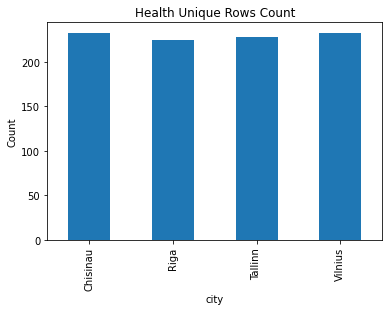

In [37]:
# count number of unique rows based on index
count = df_health_prototype.groupby('city').size()

# plot the results as a bar chart
count.plot(kind='bar')
plt.xlabel('city')
plt.ylabel('Count')
plt.title('Health Unique Rows Count')
plt.show()